In [39]:
import tensorflow as tf
import json
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
def loadMaps():
    with open('maps1.json', 'r') as f:
        a = json.load(f)
    return copy.deepcopy(a)

In [41]:
maps = loadMaps()

print(np.array(maps["maps"][10]).reshape(20,20))


[[0.  0.  1.  0.  0.1 0.  0.  1.  0.  1.  0.  1.  1.  1.  0.  0.  1.  0.
  1.  0. ]
 [0.  1.  1.  0.  1.  1.  0.  1.  0.  1.  1.  1.  0.  1.  1.  0.  1.  0.
  1.  1. ]
 [0.  1.  0.1 0.1 0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.
  0.  0. ]
 [1.  1.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  0.1 1.  0.1 0.  1.  1.
  1.  1. ]
 [0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.
  0.  1. ]
 [1.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.1 1.
  1.  1. ]
 [1.  0.  1.  1.  1.  1.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.
  0.1 0.1]
 [1.  1.  1.  0.  1.  1.  1.  0.9 0.8 0.7 1.  0.  0.  1.  1.  0.  0.  0.
  1.  1. ]
 [0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.
  1.  0. ]
 [1.  1.  1.  1.  1.  0.2 0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  1.  0.
  1.  1. ]
 [0.  1.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  1.  0.
  0.  1. ]
 [1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  1.
  1

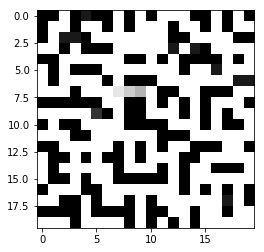

In [80]:
plt.imshow(np.array(maps["maps"][10]).reshape(20,20), cmap='gist_gray')


In [43]:
def normalize(flattened):
    for i in range(len(flattened)):
        minimum = min(flattened)
        maximum = max(flattened)
        flattened[i] = (flattened[i]-minimum)/(maximum - minimum)
        
    return flattened
        
        
        

In [44]:
normalized = maps["maps"]
# for i in maps["maps"]:
#     normalized.append(normalize(i))
# print(normalized[0])

In [45]:
# newMaps = {
#     "maps":[],
#     "moves":[]
# }

# newMaps["maps"] = normalized
# newMaps["moves"] = maps["moves"]

# def writeMaps(maps):
#     with open('normalizedMaps.json', 'w') as f:
#         a = json.dump(maps, f, separators=(',', ': '), indent=4)
# writeMaps(newMaps)

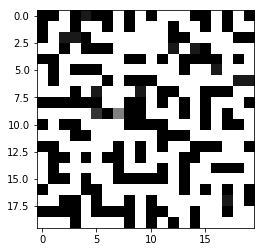

In [46]:
from sklearn.preprocessing import MinMaxScaler
import cv2
npMaps = np.array(maps["maps"])
scaler = MinMaxScaler()
hey = scaler.fit_transform(npMaps[0].reshape(20,20))

plt.imshow(np.array(normalized[0]).reshape(20,20),cmap='gist_gray')



In [47]:
from sklearn.preprocessing import OneHotEncoder

npSolution = np.array(maps["moves"]).reshape(len(maps["moves"]), 1)
onehot_encoder = OneHotEncoder(sparse=False)
encoded = onehot_encoder.fit_transform(npSolution)

print(encoded)


[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


/home/milkylatte/anaconda3/envs/tf/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(np.array(normalized), encoded, test_size=0.3, random_state = 101)

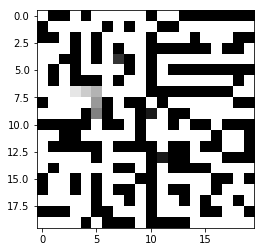

In [50]:
plt.imshow(X_train[3].reshape(20,20), cmap="gist_gray")

In [51]:
# x = tf.placeholder(tf.float32, shape=[None, 400])

In [52]:
# W = tf.Variable(tf.zeros([400, 4]))

In [53]:
# b = tf.Variable(tf.zeros([4]))

In [54]:
# y = tf.matmul(x, W) + b

In [55]:
# y_true = tf.placeholder(tf.float32, [None, 4])

In [56]:
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [57]:
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [58]:
# train = optimizer.minimize(cross_entropy)

In [59]:
# init = tf.global_variables_initializer()

In [60]:
# with tf.Session() as sess:
#     sess.run(init)
    
#     for step in range(10000):
#         i = np.random.randint(0, len(X_train)-100)
#         sess.run(train, feed_dict={x: X_train[i:i+100], y_true: y_train[i:i+100]})
        
#     matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
#     acc = tf.reduce_mean(tf.cast(matches, tf.float32))
#     print(sess.run(acc, feed_dict={x:X_test, y_true: y_test}))
        
        

In [61]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [62]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [63]:
def conv2d(x, W):
    # x --> [batch, H, W, Channels]
    # W --> [filter H, filter W, Channels IN, Channels OUT]
    
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

In [64]:
def max_pool_2by2(x):
    # x --> [batch, h, w, c]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [65]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W)+b)

In [66]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [98]:
x = tf.placeholder(tf.float32, shape=[None, 400])

In [99]:
y_true = tf.placeholder(tf.float32,shape=[None, 4])

In [115]:
x_image = tf.reshape(x, [-1,20,20,1])

In [116]:
convo_1 = convolutional_layer(x_image, shape=[5,5,1,32])
#convo_1_pooling = max_pool_2by2(convo_1)

In [117]:
convo_2 = convolutional_layer(convo_1, shape=[5,5,32,64])
#convo_2_pooling = max_pool_2by2(convo_2)

In [118]:
convo_3 = convolutional_layer(convo_2, shape=[5,5,64,64])
#convo_3_pooling = max_pool_2by2(convo_3)

In [119]:
convo_4 = convolutional_layer(convo_3, shape=[5,5,64,64])
#convo_4_pooling = max_pool_2by2(convo_4)

In [120]:
convo_5 = convolutional_layer(convo_4, shape=[5,5,64,64])
convo_5_pooling = max_pool_2by2(convo_5)

In [121]:
convo_6 = convolutional_layer(convo_5_pooling, shape=[5,5,64,64])
convo_6_pooling = max_pool_2by2(convo_6)

In [122]:
convo_2_flat = tf.reshape(convo_6_pooling,[-1,5*5*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat, 1024))

In [123]:
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob=hold_prob)

In [124]:
y_pred = normal_full_layer(full_one_dropout, 4)

In [125]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

In [126]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

In [127]:
init = tf.global_variables_initializer()

In [128]:
# with tf.Session() as sess:
#     sess.run(init)
    
#     for step in range(10000):
#         i = np.random.randint(0, len(X_train)-100)
#         sess.run(train, feed_dict={x: X_train[i:i+100], y_true: y_train[i:i+100]})
        
#     matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
#     acc = tf.reduce_mean(tf.cast(matches, tf.float32))
#     print(sess.run(acc, feed_dict={x:X_test, y_true: y_test}))

In [129]:
steps = 100000

with tf.Session() as sess:
    sess.run(init)
    for j in range(steps):
        i = np.random.randint(0, len(X_train)-100)

        sess.run(train, feed_dict={x:X_train[i:i+100], y_true:y_train[i:i+100], hold_prob:0.5})
        if j%100 == 0:
            print("ON STEP: {}".format(j))
            print("ACCURACY: ")
            
            matches = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
            acc = tf.reduce_mean(tf.cast(matches, tf.float32))
            print(sess.run(acc, feed_dict={x:X_test[:10000], y_true:y_test[:10000], hold_prob:1.0}))

ON STEP: 0
ACCURACY: 
0.2598
ON STEP: 100
ACCURACY: 
0.2637
ON STEP: 200
ACCURACY: 
0.2626
ON STEP: 300
ACCURACY: 
0.2554
ON STEP: 400
ACCURACY: 
0.2534
ON STEP: 500
ACCURACY: 
0.2586
ON STEP: 600
ACCURACY: 
0.2549
ON STEP: 700
ACCURACY: 
0.2583
ON STEP: 800
ACCURACY: 
0.2514
ON STEP: 900
ACCURACY: 
0.263
ON STEP: 1000
ACCURACY: 
0.2607
ON STEP: 1100
ACCURACY: 
0.2648
ON STEP: 1200
ACCURACY: 
0.2654
ON STEP: 1300
ACCURACY: 
0.267
ON STEP: 1400
ACCURACY: 
0.2628
ON STEP: 1500
ACCURACY: 
0.2652
ON STEP: 1600
ACCURACY: 
0.2684
ON STEP: 1700
ACCURACY: 
0.2641
ON STEP: 1800
ACCURACY: 
0.2642
ON STEP: 1900
ACCURACY: 
0.2674
ON STEP: 2000
ACCURACY: 
0.2676
ON STEP: 2100
ACCURACY: 
0.2614
ON STEP: 2200
ACCURACY: 
0.2609
ON STEP: 2300
ACCURACY: 
0.266
ON STEP: 2400
ACCURACY: 
0.2708
ON STEP: 2500
ACCURACY: 
0.2619
ON STEP: 2600
ACCURACY: 
0.263
ON STEP: 2700
ACCURACY: 
0.2655
ON STEP: 2800
ACCURACY: 
0.2606
ON STEP: 2900
ACCURACY: 
0.2698
ON STEP: 3000
ACCURACY: 
0.2668
ON STEP: 3100
ACCURACY: 

0.4101
ON STEP: 25300
ACCURACY: 
0.3958
ON STEP: 25400
ACCURACY: 
0.3985
ON STEP: 25500
ACCURACY: 
0.4005
ON STEP: 25600
ACCURACY: 
0.4037
ON STEP: 25700
ACCURACY: 
0.3955
ON STEP: 25800
ACCURACY: 
0.4027
ON STEP: 25900
ACCURACY: 
0.3985
ON STEP: 26000
ACCURACY: 
0.3968
ON STEP: 26100
ACCURACY: 
0.4052
ON STEP: 26200
ACCURACY: 
0.4027
ON STEP: 26300
ACCURACY: 
0.405
ON STEP: 26400
ACCURACY: 
0.4026
ON STEP: 26500
ACCURACY: 
0.404
ON STEP: 26600
ACCURACY: 
0.4069
ON STEP: 26700
ACCURACY: 
0.4115
ON STEP: 26800
ACCURACY: 
0.4013
ON STEP: 26900
ACCURACY: 
0.4093
ON STEP: 27000
ACCURACY: 
0.4095
ON STEP: 27100
ACCURACY: 
0.4086
ON STEP: 27200
ACCURACY: 
0.4104
ON STEP: 27300
ACCURACY: 
0.4132
ON STEP: 27400
ACCURACY: 
0.4054
ON STEP: 27500
ACCURACY: 
0.4113
ON STEP: 27600
ACCURACY: 
0.4059
ON STEP: 27700
ACCURACY: 
0.4007
ON STEP: 27800
ACCURACY: 
0.4061
ON STEP: 27900
ACCURACY: 
0.41
ON STEP: 28000
ACCURACY: 
0.4134
ON STEP: 28100
ACCURACY: 
0.4117
ON STEP: 28200
ACCURACY: 
0.4051
ON STEP

0.4597
ON STEP: 50300
ACCURACY: 
0.4599
ON STEP: 50400
ACCURACY: 
0.4641
ON STEP: 50500
ACCURACY: 
0.4615
ON STEP: 50600
ACCURACY: 
0.4698
ON STEP: 50700
ACCURACY: 
0.4643
ON STEP: 50800
ACCURACY: 
0.4614
ON STEP: 50900
ACCURACY: 
0.4679
ON STEP: 51000
ACCURACY: 
0.4612
ON STEP: 51100
ACCURACY: 
0.4633
ON STEP: 51200
ACCURACY: 
0.4698
ON STEP: 51300
ACCURACY: 
0.4716
ON STEP: 51400
ACCURACY: 
0.4738
ON STEP: 51500
ACCURACY: 
0.4624
ON STEP: 51600
ACCURACY: 
0.4699
ON STEP: 51700
ACCURACY: 
0.4657
ON STEP: 51800
ACCURACY: 
0.4708
ON STEP: 51900
ACCURACY: 
0.4655
ON STEP: 52000
ACCURACY: 
0.4643
ON STEP: 52100
ACCURACY: 
0.4693
ON STEP: 52200
ACCURACY: 
0.4722
ON STEP: 52300
ACCURACY: 
0.4679
ON STEP: 52400
ACCURACY: 
0.4733
ON STEP: 52500
ACCURACY: 
0.4633
ON STEP: 52600
ACCURACY: 
0.4591
ON STEP: 52700
ACCURACY: 
0.4705
ON STEP: 52800
ACCURACY: 
0.4689
ON STEP: 52900
ACCURACY: 
0.4709
ON STEP: 53000
ACCURACY: 
0.4691
ON STEP: 53100
ACCURACY: 
0.4716
ON STEP: 53200
ACCURACY: 
0.4696
ON 

0.4748
ON STEP: 75200
ACCURACY: 
0.4779
ON STEP: 75300
ACCURACY: 
0.4753
ON STEP: 75400
ACCURACY: 
0.4804
ON STEP: 75500
ACCURACY: 
0.4801
ON STEP: 75600
ACCURACY: 
0.4813
ON STEP: 75700
ACCURACY: 
0.4783
ON STEP: 75800
ACCURACY: 
0.4776
ON STEP: 75900
ACCURACY: 
0.4805
ON STEP: 76000
ACCURACY: 
0.4845
ON STEP: 76100
ACCURACY: 
0.4801
ON STEP: 76200
ACCURACY: 
0.4752
ON STEP: 76300
ACCURACY: 
0.4805
ON STEP: 76400
ACCURACY: 
0.4806
ON STEP: 76500
ACCURACY: 
0.4762
ON STEP: 76600
ACCURACY: 
0.4831
ON STEP: 76700
ACCURACY: 
0.4821
ON STEP: 76800
ACCURACY: 
0.486
ON STEP: 76900
ACCURACY: 
0.4823
ON STEP: 77000
ACCURACY: 
0.4856
ON STEP: 77100
ACCURACY: 
0.4845
ON STEP: 77200
ACCURACY: 
0.4826
ON STEP: 77300
ACCURACY: 
0.4853
ON STEP: 77400
ACCURACY: 
0.4878
ON STEP: 77500
ACCURACY: 
0.4783
ON STEP: 77600
ACCURACY: 
0.4804
ON STEP: 77700
ACCURACY: 
0.4803
ON STEP: 77800
ACCURACY: 
0.4787
ON STEP: 77900
ACCURACY: 
0.4848
ON STEP: 78000
ACCURACY: 
0.4851
ON STEP: 78100
ACCURACY: 
0.4815
ON S